## <span style="color:lightseagreen"> Exercise 05: Metropolis sampling applied to the Hydrogen atom </span>

In this exercise we use the Metropolis, or M(RT)$^2$ algorithm to sample the probability distribution functions $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ associated with the electron degree of freedom in the Hydrogen atom. The exact solutions of the Schroedinger equation in the Coulomb potential are well known:
$$
\begin{align}
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} \quad \quad (&\text{GS or 1s state}) \\
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta) \quad \quad & (\text{2p state})
\end{align}
$$
We are interested to use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$, which we know from analytic integration to be 
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0,
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0.
$$
As usual, we use data blocking to give an estimation of the statistical uncertainties.

In doing this we will:
- use a large number of throws $M=10^6$
- Use Bohr radius units, $a_0$ for distances
- Sample the pdfs initially with a transition probability $T(\vec{x}|\vec{y})$ that is uniform
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Use as starting position for the Metropolis walk respectively $(x,y,z)=(0,0,0)$ and $(x,y,z)=(0,0,5)$, in order to start from a representative position while avoiding zeros in the pdf (e.g. the origin for the 2p state)

Furthermore:
1) we will explore how large should the number of Monte Carlo Metropolis steps be in each block through autocorrelation time
2) discuss the influence of the starting point choice on the algorithm and equilibration steps
3) see if using a multivariate normal pdf as transition probability $T(\vec{x}|\vec{y})$ produces the same results

In [3]:
#import essential libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#parameter to use Latex in matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
#a plot label should be easy to read
plt.rcParams.update({'font.size': 14})

Monte Carlo Markov Chains (MCMC) can be used to sample an arbitrary pdf $p$ as the ones we are interested in. 
We generate such Markov Chain according to Metropolis algorithm, in brief:
- starting from $\vec{x_i}$
- propose a step with the Transition probability (or kernel) $T(\vec{x_{i+1}}|\vec{x_i})$ (here we assume it to be simmetrical and independent from the starting point i.e. $T(\vec{x_{i+1}})$)
- accept the new $\vec{x_{i+1}}$ with probability $\text{min}\left[1,\frac{p(\vec{x_{i+1}})}{p(\vec{x_{i}})} \right]$
- iterate from $\vec{x_{i+1}}$ if it was accepted, otherwise from an $\vec{x_{i+1}}$ which is set equal to $\vec{x_{i}}$

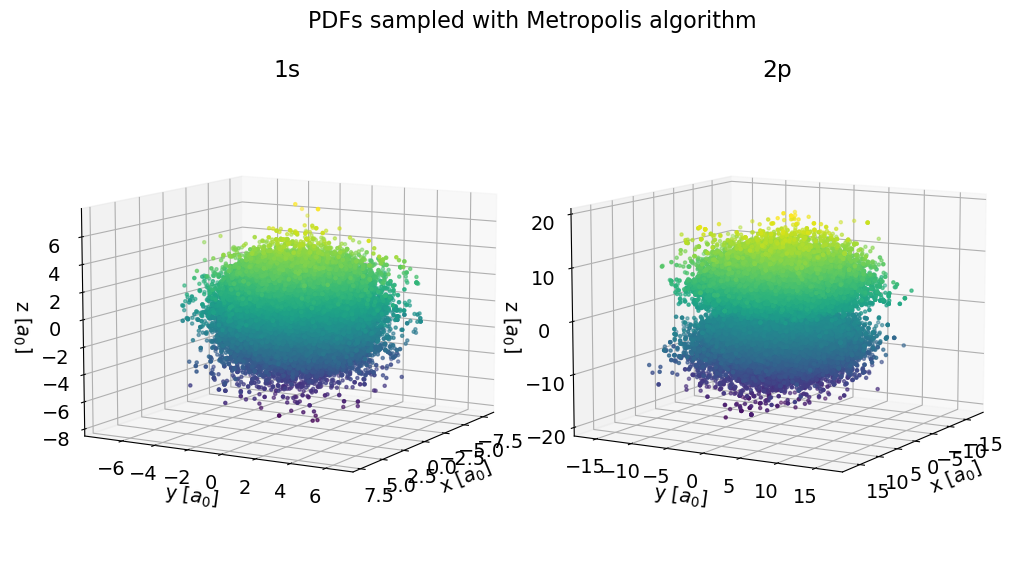

In [4]:
# Load and plot data for the first plot
data = np.loadtxt('1s_unif_sample.txt', skiprows=1)
X = data[:,0]
Y = data[:,1]
Z = data[:,2]

fig = plt.figure(figsize=(10, 6))  # Set the figure size
fig.suptitle('PDFs sampled with Metropolis algorithm', fontsize=16)
ax1 = fig.add_subplot(121, projection='3d')  # 121 indicates 1 row, 2 columns, plot 1
ax1.scatter(X, Y, Z, c=Z, marker='.')
ax1.set_xlabel(r'x [$a_0$]')
ax1.set_ylabel(r'y [$a_0$]')
ax1.set_zlabel(r'z [$a_0$]')
ax1.view_init(10, 30)
ax1.set_title(r"1s")

# Load and plot data for the second plot
data = np.loadtxt('2p_unif_sample.txt', skiprows=1)
X = data[:,0]
Y = data[:,1]
Z = data[:,2]

ax2 = fig.add_subplot(122, projection='3d')  # 122 indicates 1 row, 2 columns, plot 2
ax2.scatter(X, Y, Z, c=Z, marker='.')
ax2.set_xlabel(r'x [$a_0$]')
ax2.set_ylabel(r'y [$a_0$]')
ax2.set_zlabel(r'z [$a_0$]')
ax2.view_init(10, 30)
ax2.set_title(r"2p")

plt.tight_layout()  # Automatically adjust subplots to prevent overlap
plt.show()

In order for the algorithm to explore the whole space (where the pdf $p$ assumes relevant values), the transition probability $T$ should not propose too big nor too small steps:
- if the step is too small, the MCMC spends too much time in the same region, with the risk of losing track of relevant zones of the pdf. Furthermore, a small step could not be able to jump nodes.
- if the step is too big, sharp variations in the pdf would mean that no step is accepted, leading to an inefficient or incapable algorithm.

Since a step that's too small can be diagnosed with a high acceptance rate (cumulative number of steps accepted divided by total nomber of proposed steps), to avoid both extreme cases it is considered a rule of thumb to have a 0.5 acceptance rate. In order to reach such value the width of the transition probability $T$ can be adjusted. We did such by modyfing the variance of the transition kernel, it being an uniform pdf or a gaussian pdf.

As an example we report the width chosen for the transition probability used to sample the 1s orbital (1.3) and the 2p orbital (3.2) with an uniform pdf. This width represents the maximum step length. We can argue that in the second case the width is higher since the pdf is more spread in the real space and it also presents nodes.

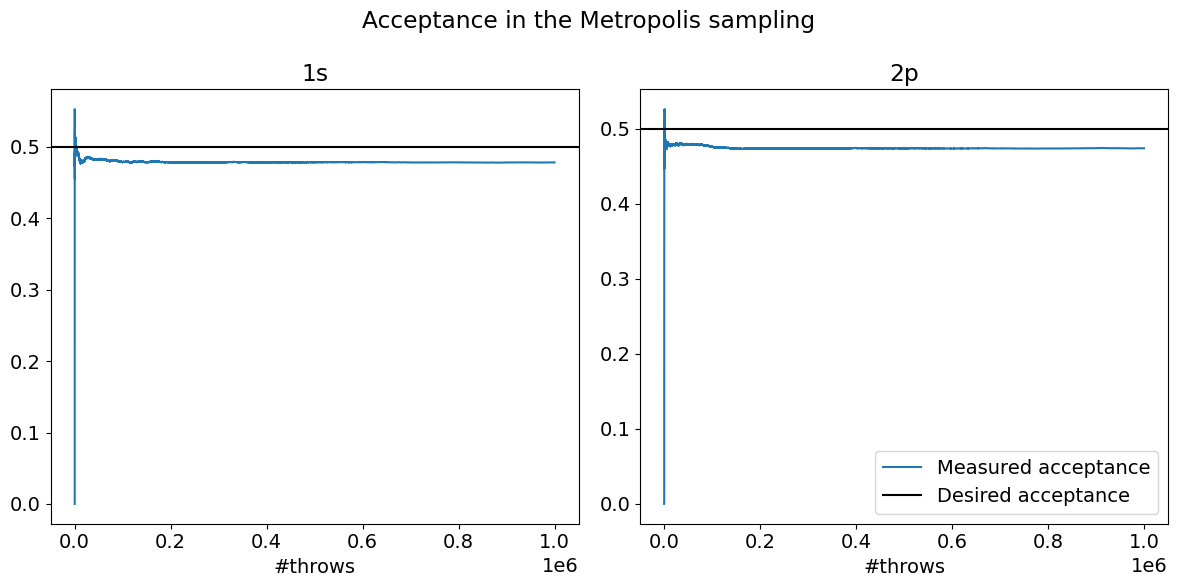

In [9]:
# Load and plot data for the first plot
data1s = np.loadtxt('acceptance1s.txt', skiprows=1)
plt.figure(figsize=(12, 6))  # Set the figure size for the first plot
x1 = range(len(data1s[:,0]))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
plt.plot(x1, data1s[:,1]/data1s[:,0])
plt.axhline(y=0.5, color='black')

plt.title('1s')  # Set the title for the first plot
plt.xlabel('#throws')  # Add an X-axis label
#plt.ylabel('Y-axis label')  # Add a Y-axis label

# Load and plot data for the second plot
data2p = np.loadtxt('acceptance2p.txt', skiprows=1)
x2 = range(len(data2p[:,0]))
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
plt.plot(x2, data2p[:,1]/data2p[:,0], label="Measured acceptance")
plt.axhline(y=0.5, color='black', label="Desired acceptance")
plt.title('2p')  # Set the title for the second plot
plt.xlabel('#throws')  # Add an X-axis label
#plt.ylabel('Y-axis label')  # Add a Y-axis label
plt.legend()

# Set the same scale for both plots
#plt.axis('equal')

# Add a general title above both plots
plt.suptitle('Acceptance in the Metropolis sampling')

plt.tight_layout()  # Automatically adjust subplots to prevent overlap
plt.show()

With the sampled PDFs we can easily evaluate the mean radius $\langle r \rangle$ using Monte Carlo Integration with blocking average to estimate the error.
As an informal reminder:
$$
\langle r \rangle = \int dx\,dy\,dz\,\, |\psi(x,y,z)|^2 \, r \approx \frac{1}{N} \sum_{x_i \sim p(x)} r(x_i)
$$

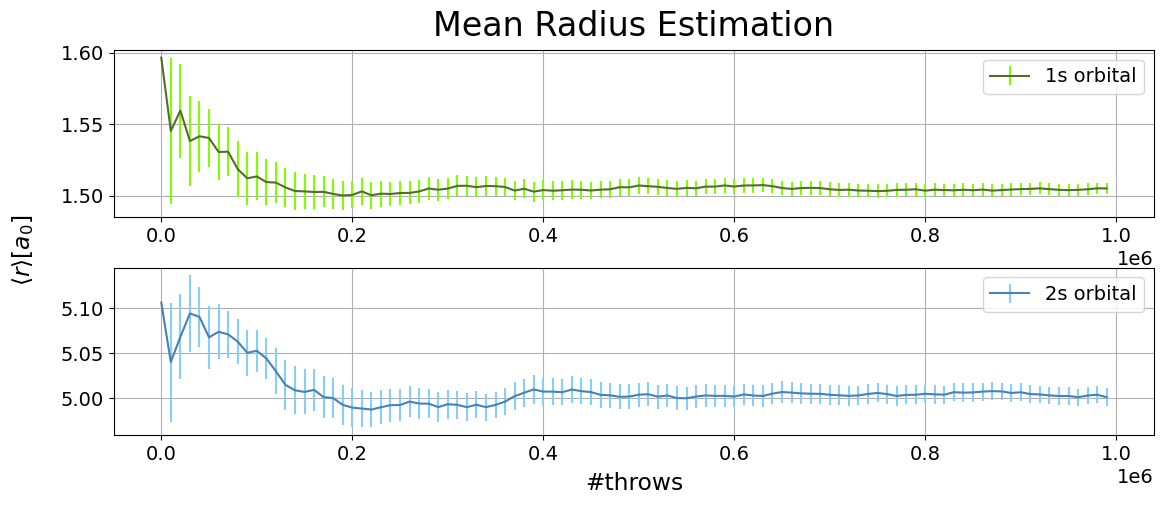

In [10]:
#import data formatted as table from a .txt file
data = np.loadtxt('radii_1s_2p_unif.txt', skiprows=1)
M=1e6                 # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
#populate and rescale x axis
x= np.arange(N)*L 

#plot the results with errors
fig,ax = plt.subplots(2,1,figsize=(13,5))
axs = ax.flatten()
axs[0].errorbar(x,data[:,0],yerr=data[:,1], color="darkolivegreen", ecolor="chartreuse", label='1s orbital')
axs[0].grid(True)
#axs[0].set_ylim(-0.0065,0.0065)
axs[0].legend()


axs[1].errorbar(x,data[:,2],yerr=data[:,3], color="steelblue", ecolor="lightskyblue", label='2s orbital')
axs[1].grid(True)
#axs[1].set_ylim(-0.001,0.001)
axs[1].legend()

fig.supxlabel('#throws')
fig.supylabel(r'$\langle r \rangle [a_0]$')

fig.suptitle("Mean Radius Estimation",fontsize=24)
plt.subplots_adjust(left=0.1, bottom=0.13, right=0.9, top=0.9, wspace=0.2, hspace=0.3)

plt.show()

## <span style="color:lightseagreen"> 05.1: Correlation in Metropolis Random Walk </span>

Since each point in the sample is generated from a previous one, it is important to wonder the importance of the correlation between the points.
The autocorrelation function is therefore introduced with respect to the stochastic process $x$:
$$
Ac_{[x]}(\tau) = \frac{\text{cov}_{[x,x]}(t,t+\tau)}{\text{cov}_{[x,x]}(t,t)} = \frac{\langle x(t)x(t+\tau) \rangle - \langle x(t) \rangle \langle x(t+\tau) \rangle}{\sigma_x^2}
$$
It is useful to investigate the presence of memory in stochastic processes. Indeed, one can devise two characteristic behaviours among all the possible ones: if the autocorrelation function has a tail that's exponential, there is evidence for a characteristic time $\tau_c$ ruling the dying off of the correlation, while if the autocorrelation function is a power law, then the phenomenon presents scale invariance.

Realizing what is the $\tau_c$ (and whether there is one) in our process is crucial for the correct use of the MCMC: using measurements than are closer than $\tau_c$ will lead to wrong results. A good distance between measurement to have uncorrelatedness is $2\tau_c$

In the following we evaluated the autocorrelation time in two ways:
- using the discrete Fourier transform (DFT) and its antitransform
- by definition, or bruce force algorithm

You can see from the plots that the two methods bring the same results, however the first is computationally more feasible, as it scales with the number of points as $n \cdot \log n$, counterposed to the scaling $n^2$ of the brute force method.

The first method is outlined below:

1) Evaluate the DFT of the stochastic process.

2) Evaluate the power spectrum density (PSD) as the modulus square of the process in reciprocal space divided by the number of elements.

3) The autocorrelation is the inverse Fourier transform of the PSD.

The power of this algorithm lies in the FFT (Fast Fourier Transform) algorithm, which calculates DFTs with $n \cdot \log n$ cost.

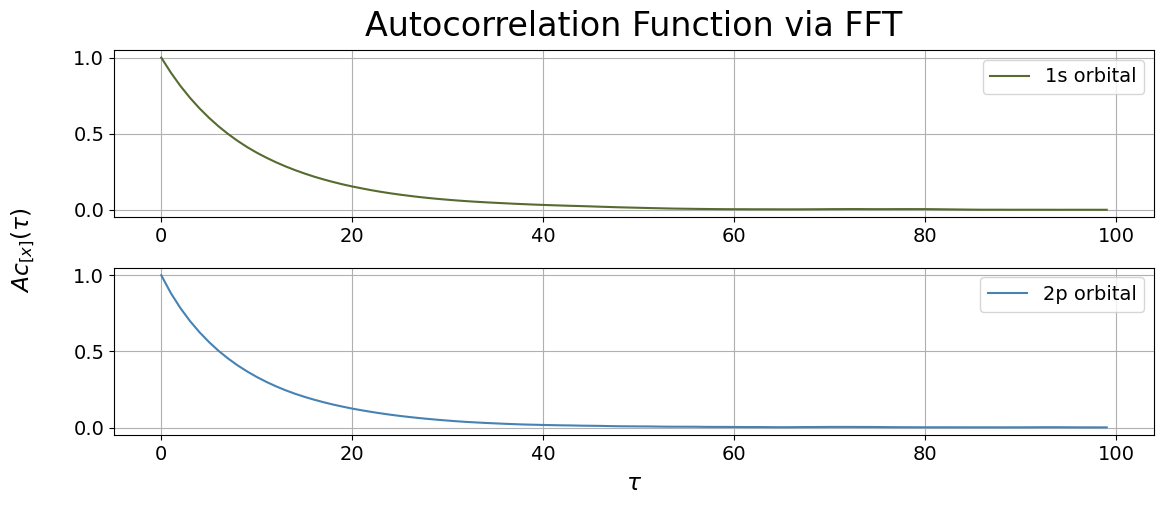

In [47]:
#import data formatted as table from a .txt file
data = np.loadtxt('autocorrelationsViaFFT.txt', skiprows=1)

N=100
x= np.arange(N)

fig,ax = plt.subplots(2,1,figsize=(13,5))
axs = ax.flatten()
axs[0].plot(x,data[:N,0], color="darkolivegreen", label='1s orbital')
axs[0].grid(True)
#axs[0].set_ylim(-0.0065,0.0065)
axs[0].legend()


axs[1].plot(x,data[:N,1], color="steelblue", label='2p orbital')
axs[1].grid(True)
#axs[1].set_ylim(-0.001,0.001)
axs[1].legend()

fig.supxlabel(r'$\tau$')
fig.supylabel(r'$Ac_{[x]}(\tau)$')

fig.suptitle("Autocorrelation Function via FFT",fontsize=24)
plt.subplots_adjust(left=0.1, bottom=0.13, right=0.9, top=0.9, wspace=0.2, hspace=0.3)

plt.show()

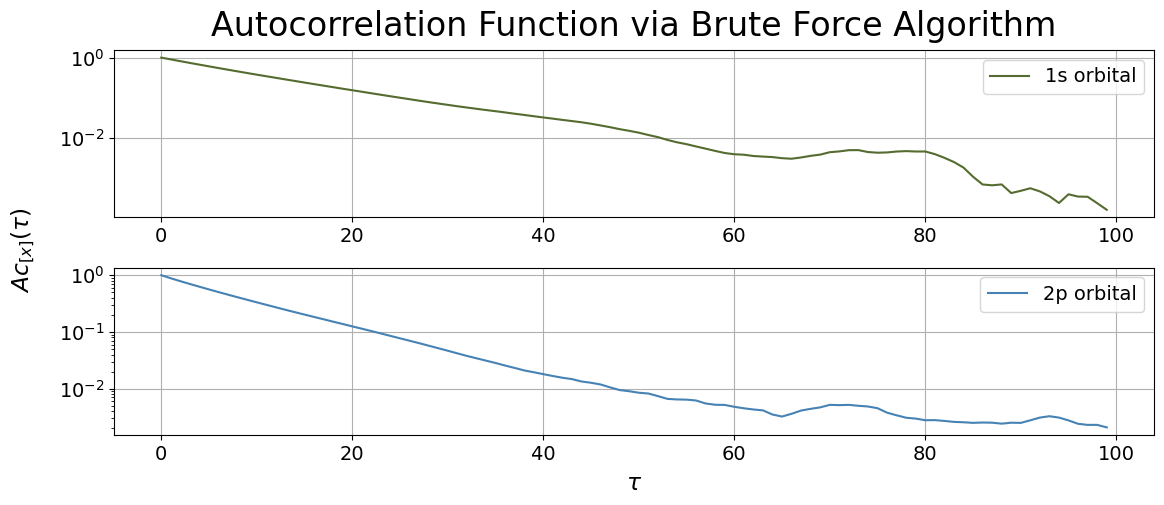

In [48]:
#import data formatted as table from a .txt file
data = np.loadtxt('autocorrelationsViaDefinition.txt', skiprows=1)

N=1e2
x= np.arange(N)

fig,ax = plt.subplots(2,1,figsize=(13,5))
axs = ax.flatten()
axs[0].plot(x,data[:100,0], color="darkolivegreen", label='1s orbital')
axs[0].grid(True)
#axs[0].set_ylim(-0.0065,0.0065)
axs[0].legend()


axs[1].plot(x,data[:100,1], color="steelblue", label='2p orbital')
axs[1].grid(True)
#axs[1].set_ylim(-0.001,0.001)
axs[1].legend()

fig.supxlabel(r'$\tau$')
fig.supylabel(r'$Ac_{[x]}(\tau)$')
axs[0].set_yscale("log")
axs[1].set_yscale("log")
fig.suptitle("Autocorrelation Function via Brute Force Algorithm",fontsize=24)
plt.subplots_adjust(left=0.1, bottom=0.13, right=0.9, top=0.9, wspace=0.2, hspace=0.3)

plt.show()

## <span style="color:lightseagreen"> 05.2: What happens when one varies the starting point? </span>


Imagine one wants to sample a Normal function with the Metropolis algorithm. If they start very far off the origin the chain will take forever to get to the relevant part of the pdf. And even if it eventually gets there, (1) not only so much computational time will be lost, (2) but also one will have many points that are not representative, and will deviate the sample from a "typical" one. Surely, when the pdf one wants to sample is unknown, you can't blame the loss of computational time. Yet, the second problem should be addressed.

Below we show the 1s orbital sample obtained starting far from the origin, in (0,0,20).

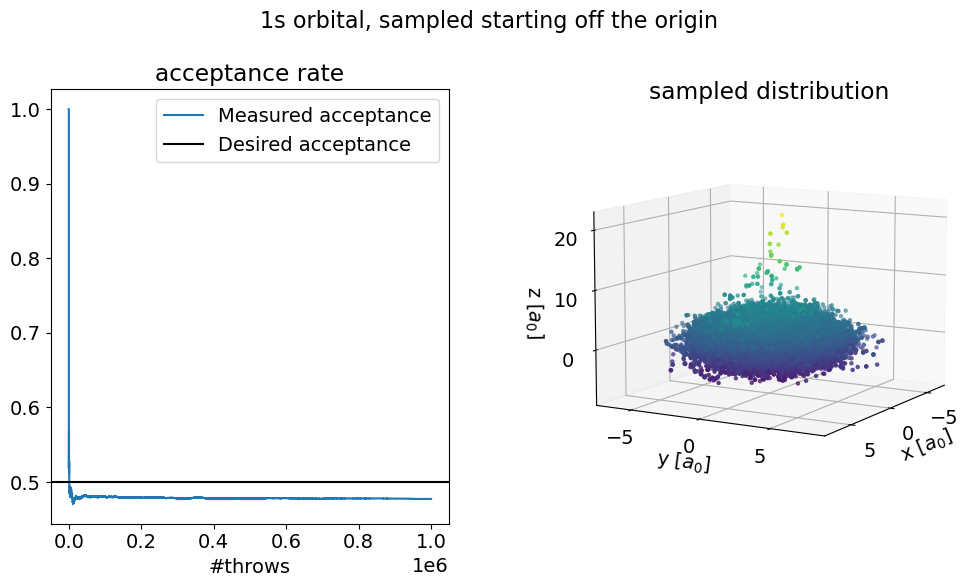

In [45]:
# Load and plot data for the first plot
data1 = np.loadtxt('acceptance1s_offstart.txt', skiprows=1)
x1 = range(len(data1[:,0]))

# Create the first subplot
fig = plt.figure(figsize=(10, 6))  # Set the figure size
fig.suptitle('1s orbital, sampled starting off the origin', fontsize=16)
plt.subplots_adjust(wspace=2)

ax1 = fig.add_subplot(121)  # 121 indicates 1 row, 2 columns, plot 1

# Plot the first data
ax1.plot(x1, data1[:,1]/data1[:,0], label="Measured acceptance")
ax1.axhline(y=0.5, color='black', label="Desired acceptance")
ax1.set_title('acceptance rate')  
ax1.set_xlabel('#throws')
ax1.legend()

# Load and plot data for the second plot
data2 = np.loadtxt('1s_unif_sample_offstart.txt', skiprows=1)
x2 = data2[:,0]
y2 = data2[:,1]
z2 = data2[:,2]

ax2 = fig.add_subplot(122, projection='3d')  # 121 indicates 1 row, 2 columns, plot 1

# Plot the second data
ax2.scatter(x2, y2, z2, c=z2, marker='.')b
ax2.set_xlabel(r'x [$a_0$]')
ax2.set_ylabel(r'y [$a_0$]')
ax2.set_zlabel(r'z [$a_0$]')
ax2.view_init(10, 30)
ax2.set_title(r"sampled distribution")

plt.tight_layout()  # Automatically adjust subplots to prevent overlap
plt.show()

In order to address the problem and recover a good sample of the target pdf, it is common use to burn a set of the initial steps, regarding them as equilibration or thermalization steps. We show below the results with a number of equilibration steps equal to half the total number of steps.

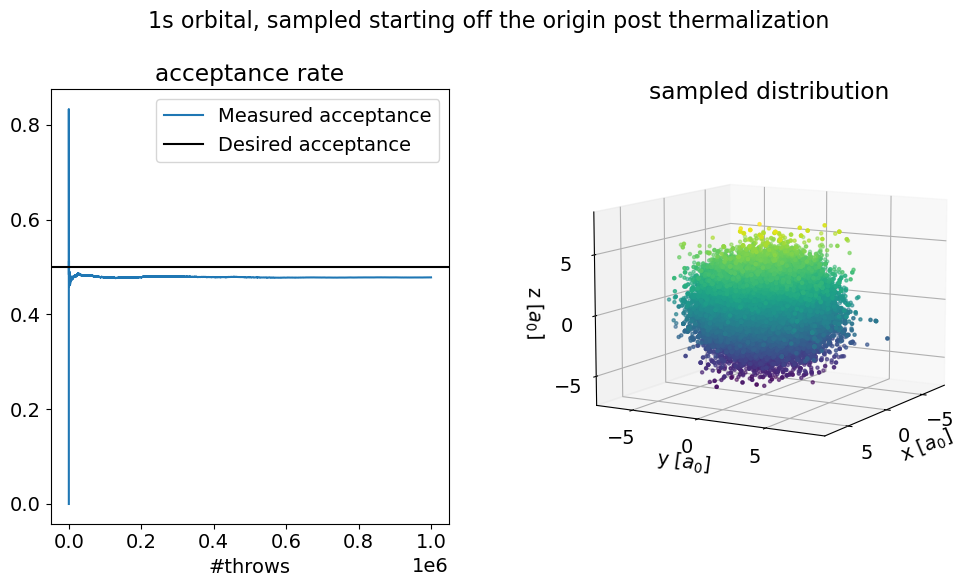

In [46]:
# Load and plot data for the first plot
data1 = np.loadtxt('acceptance1s_postTherm.txt', skiprows=1)
x1 = range(len(data1[:,0]))

# Create the first subplot
fig = plt.figure(figsize=(10, 6))  # Set the figure size
fig.suptitle('1s orbital, sampled starting off the origin post thermalization', fontsize=16)
plt.subplots_adjust(wspace=2)

ax1 = fig.add_subplot(121)  # 121 indicates 1 row, 2 columns, plot 1

# Plot the first data
ax1.plot(x1, data1[:,1]/data1[:,0], label="Measured acceptance")
ax1.axhline(y=0.5, color='black', label="Desired acceptance")
ax1.set_title('acceptance rate')  
ax1.set_xlabel('#throws')
ax1.legend()

# Load and plot data for the second plot
data2 = np.loadtxt('1s_unif_sample_postTherm.txt', skiprows=1)
x2 = data2[:,0]
y2 = data2[:,1]
z2 = data2[:,2]

ax2 = fig.add_subplot(122, projection='3d')  # 121 indicates 1 row, 2 columns, plot 1

# Plot the second data
ax2.scatter(x2, y2, z2, c=z2, marker='.')
ax2.set_xlabel(r'x [$a_0$]')
ax2.set_ylabel(r'y [$a_0$]')
ax2.set_zlabel(r'z [$a_0$]')
ax2.view_init(10, 30)
ax2.set_title(r"sampled distribution")

plt.tight_layout()  # Automatically adjust subplots to prevent overlap
plt.show()

## <span style="color:lightseagreen"> 05.3: Gaussian Transition Probability </span>

A unifrom kernel is not the only choice for a transition probability. We show in the following that one can reproduce good results e.g. by using a Gaussian kernel.

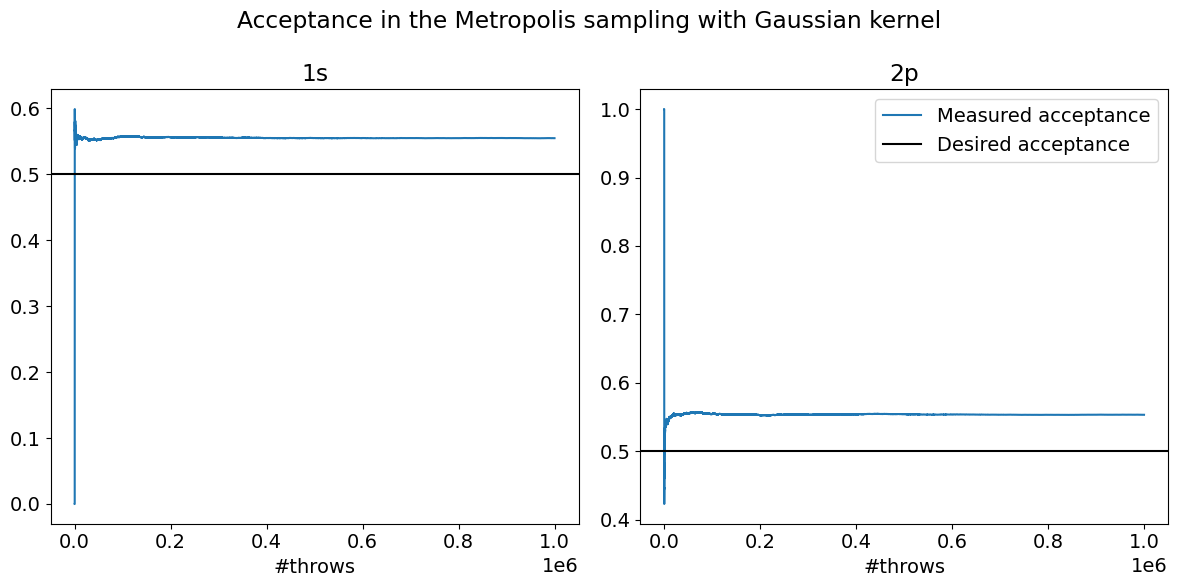

In [49]:
# Load and plot data for the first plot
data1s = np.loadtxt('acceptance1s_gauss.txt', skiprows=1)
plt.figure(figsize=(12, 6))  # Set the figure size for the first plot
x1 = range(len(data1s[:,0]))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
plt.plot(x1, data1s[:,1]/data1s[:,0])
plt.axhline(y=0.5, color='black')

plt.title('1s')  # Set the title for the first plot
plt.xlabel('#throws')  # Add an X-axis label
#plt.ylabel('Y-axis label')  # Add a Y-axis label

# Load and plot data for the second plot
data2p = np.loadtxt('acceptance2p_gauss.txt', skiprows=1)
x2 = range(len(data2p[:,0]))
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
plt.plot(x2, data2p[:,1]/data2p[:,0], label="Measured acceptance")
plt.axhline(y=0.5, color='black', label="Desired acceptance")
plt.title('2p')  # Set the title for the second plot
plt.xlabel('#throws')  # Add an X-axis label
#plt.ylabel('Y-axis label')  # Add a Y-axis label
plt.legend()

# Set the same scale for both plots
#plt.axis('equal')

# Add a general title above both plots
plt.suptitle('Acceptance in the Metropolis sampling with Gaussian kernel')

plt.tight_layout()  # Automatically adjust subplots to prevent overlap
plt.show()

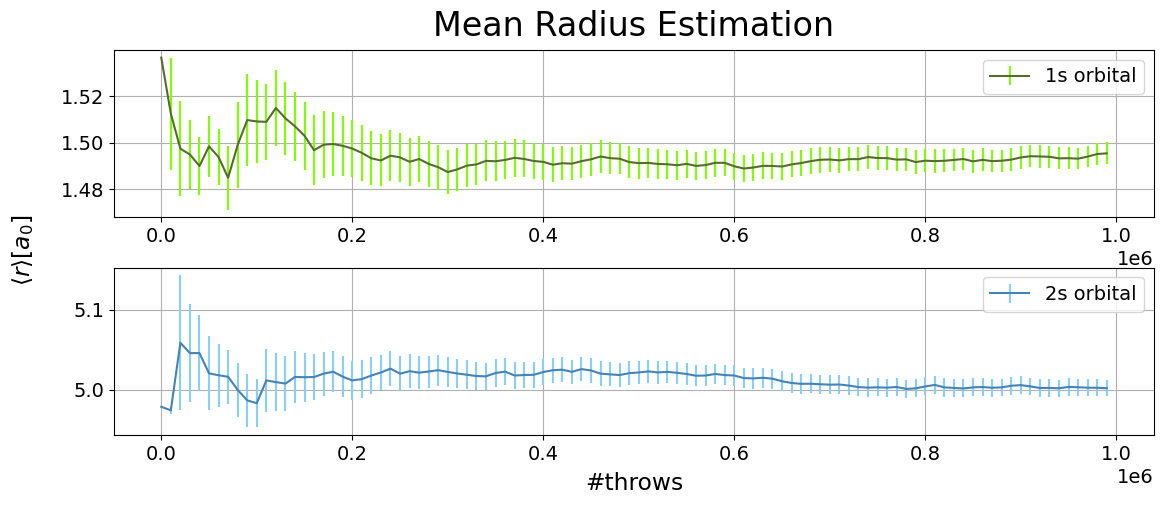

In [50]:
#import data formatted as table from a .txt file
data = np.loadtxt('radii_1s_2p_gauss.txt', skiprows=1)
M=1e6                 # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
#populate and rescale x axis
x= np.arange(N)*L 

#plot the results with errors
fig,ax = plt.subplots(2,1,figsize=(13,5))
axs = ax.flatten()
axs[0].errorbar(x,data[:,0],yerr=data[:,1], color="darkolivegreen", ecolor="chartreuse", label='1s orbital')
axs[0].grid(True)
#axs[0].set_ylim(-0.0065,0.0065)
axs[0].legend()


axs[1].errorbar(x,data[:,2],yerr=data[:,3], color="steelblue", ecolor="lightskyblue", label='2s orbital')
axs[1].grid(True)
#axs[1].set_ylim(-0.001,0.001)
axs[1].legend()

fig.supxlabel('#throws')
fig.supylabel(r'$\langle r \rangle [a_0]$')

fig.suptitle("Mean Radius Estimation",fontsize=24)
plt.subplots_adjust(left=0.1, bottom=0.13, right=0.9, top=0.9, wspace=0.2, hspace=0.3)

plt.show()